# Spaceship Titanic

<b><h3>File and Data Field Descriptions</h3></b>
- train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    - PassengerId - A unique Id for each passenger. Each Id takes the form <b><span style='color : blue'>gggg_pp</span></b> where gggg indicates a group the passenger is travelling with and pp is their number within the group.   People in a group are often family members, but not always.
    - HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    - CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    - Cabin - The cabin number where the passenger is staying. Takes the form <b><span style='color : blue'>deck/num/side</span></b>, where side can be either P for Port or S for Starboard.
    - Destination - The planet the passenger will be debarking to.
    - Age - The age of the passenger.
    - VIP - Whether the passenger has paid for special VIP service during the voyage.
    - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    - Name - The <b><span style='color : blue'>first and last names</span></b> of the passenger.
    - Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  
<br>  
- test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
<br>  
- sample_submission.csv - A submission file in the correct format.
    - PassengerId - Id for each passenger in the test set.
    - Transported - The target. For each passenger, predict either True or False.

## Load Dataset

In [236]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Simply Exploring the Dataset

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [238]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [239]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [240]:
tmp_train_numeric = train[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]]
tmp_train_numeric.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [241]:
tmp_test_numeric = test[['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',]]
tmp_test_numeric.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0


In [242]:
# Draw Boxplot for numerical data
def boxplot_df(dataframe):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    num_cols = dataframe.shape[1]
    plt.figure(figsize=(6 * num_cols, 10))

    for i, col in enumerate(dataframe.columns):
        plt.subplot(1, num_cols, i + 1)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

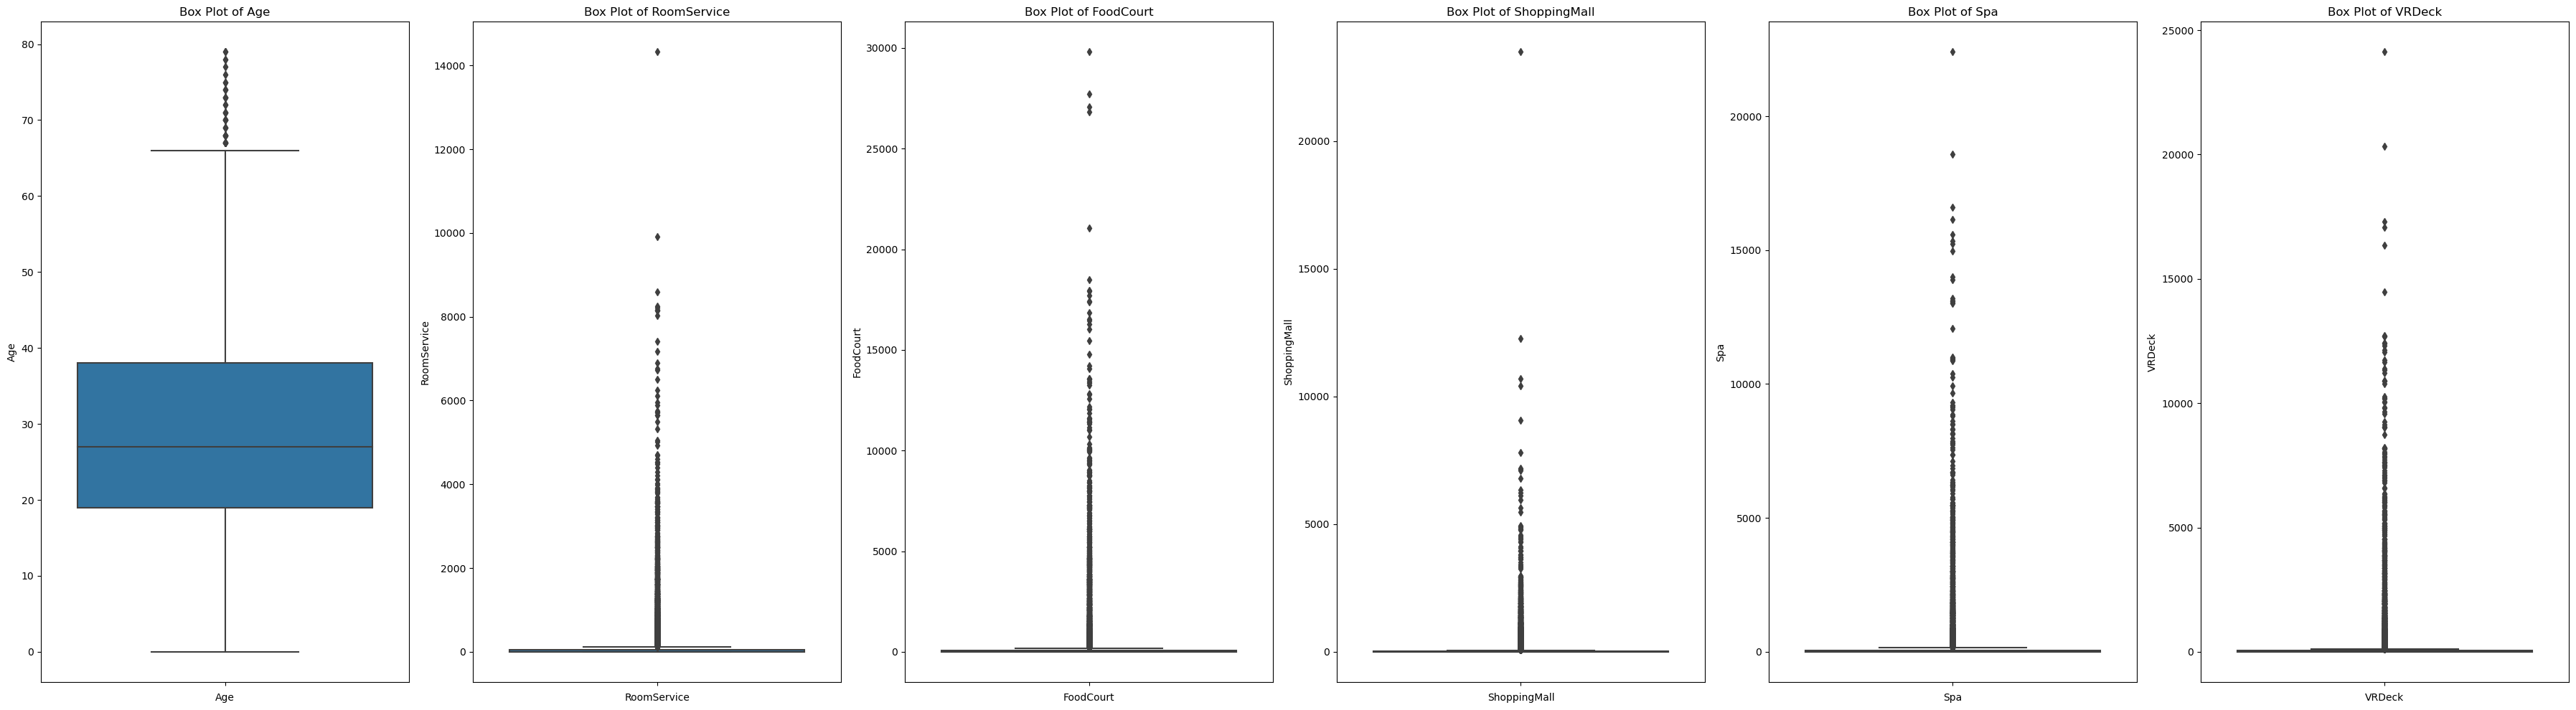

In [243]:
boxplot_df(tmp_train_numeric)

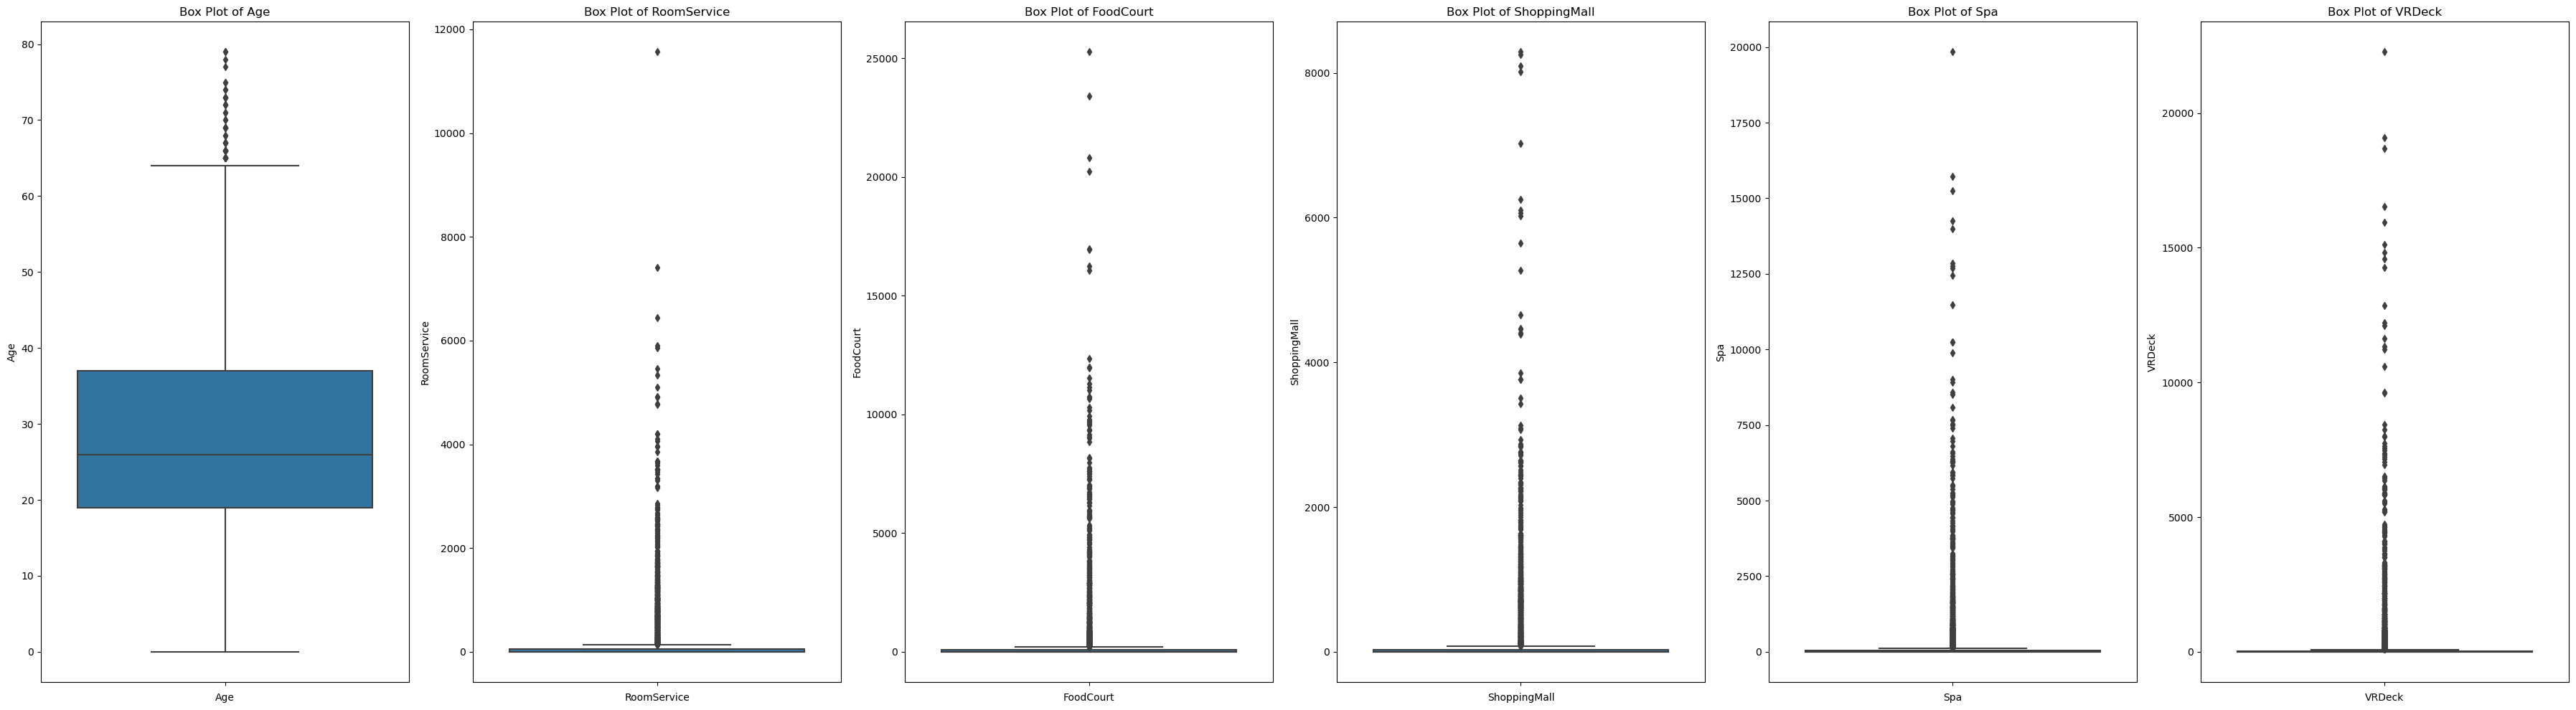

In [244]:
boxplot_df(tmp_test_numeric)

In [245]:
# Correlation Heatmap
def corr_heatmap_df(dataframe):    
    import seaborn as sns
    import matplotlib.pyplot as plt

    corr_matrix = dataframe.corr()

    plt.figure(figsize=(20,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
    plt.title('Correlation Heatmap', fontsize=14)
    plt.show()

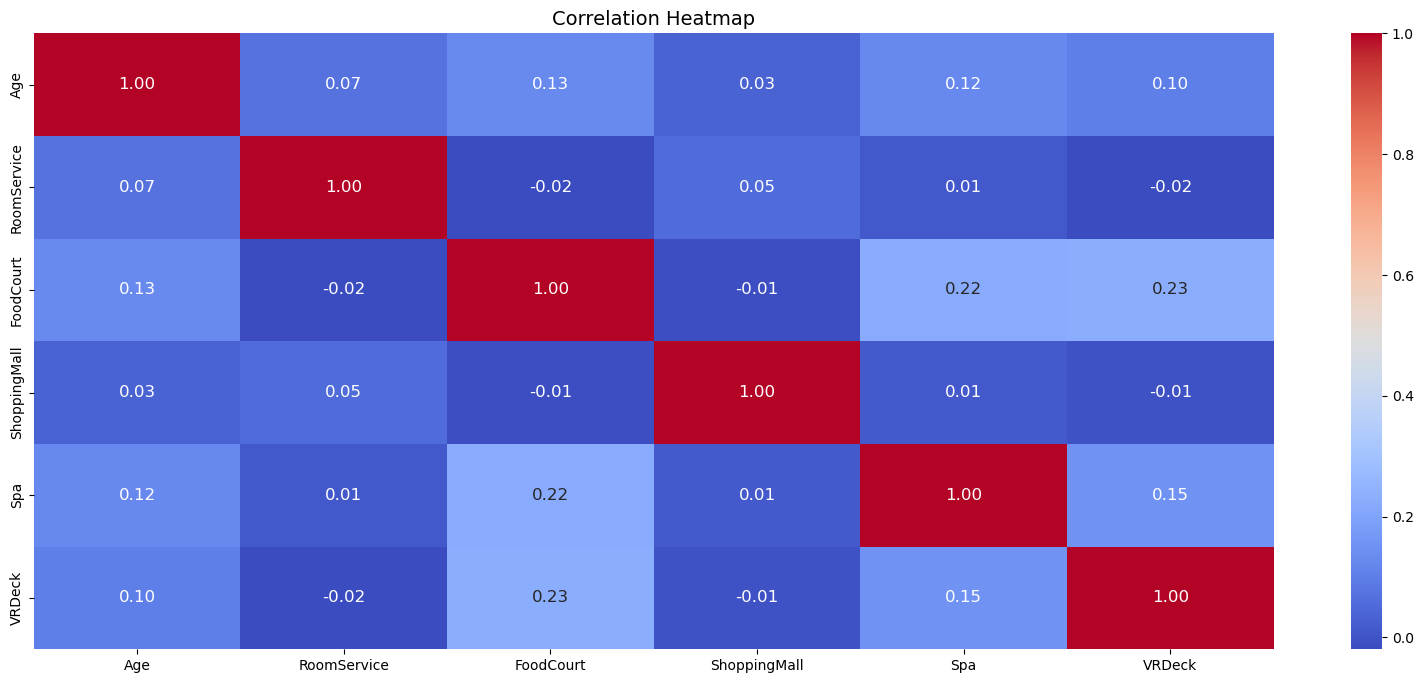

In [246]:
# Correlation Heatmap for numerical data
corr_heatmap_df(tmp_train_numeric)

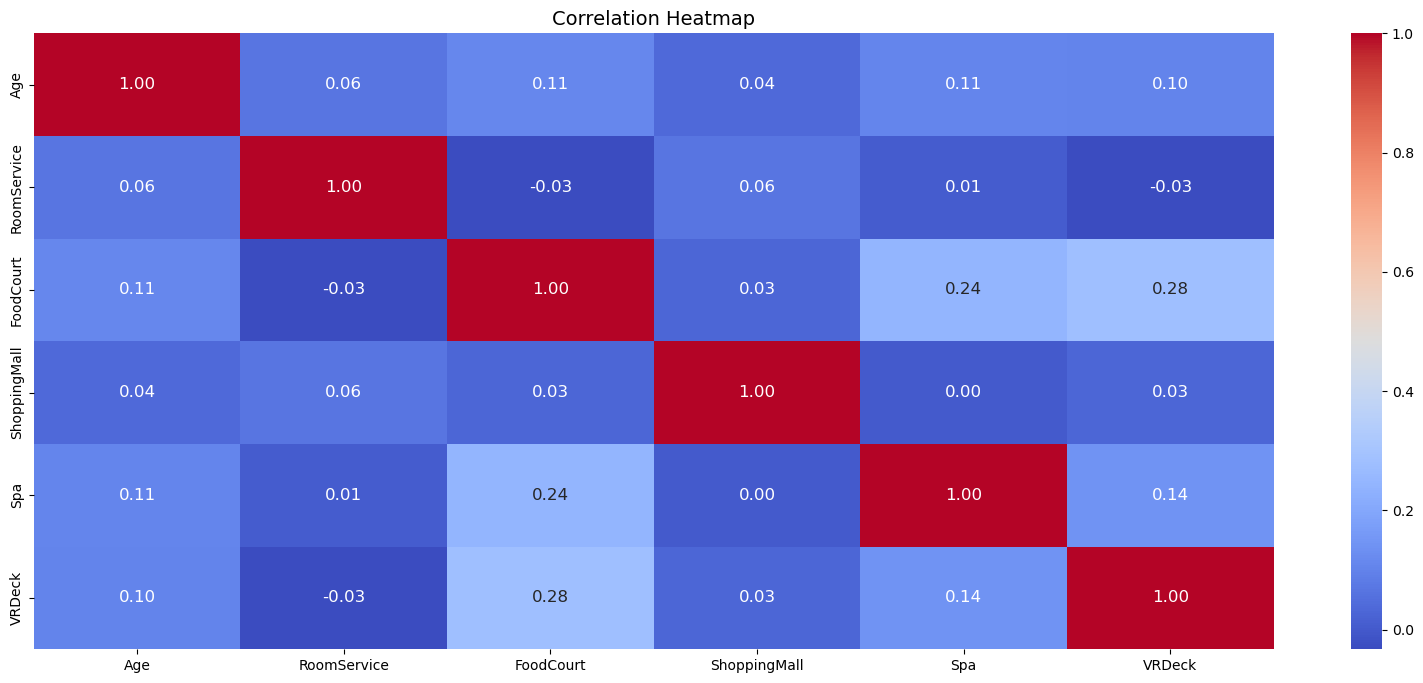

In [247]:
# Correlation Heatmap for numerical data
corr_heatmap_df(tmp_test_numeric)

## Preprocessing

- PassengerId can be splitted gggg and pp
    - Same gggg means a same group
        - it can be a same cabin(but need to check if it depends on CryoSleep) -> can fill nan in Cabin
        - it can be a same HomePlanet or Destination
- Name can be splitted First and Last name
    - Same Last name means a family
    - it can be a same HomePlanet or Destination
- Cabin can be splitted deck, num and side
    - Need to check relationship with CryoSleep
- If CryoSleep is True, it will be 0 in every cost value(ex. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)

- numerical data : fillna with median
- nominal data : fillna with mode and one-hot encode
- bool data : fillna with mode and change False to 0, True to 1

In [248]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [249]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


- Fill NaN numerical data to fill True/False in CryoSleep
- Create 'TotalCost' to sum all cost values

In [250]:
# Fill NaN numerical data
def fillna_numerical_data(dataframe):
    tmp_median = dataframe.median(numeric_only=True)

    value = {
        'Age' : tmp_median['Age'],
        'RoomService' : tmp_median['Age'],
        'FoodCourt' : tmp_median['Age'],
        'ShoppingMall' : tmp_median['Age'],
        'Spa' : tmp_median['Age'],
        'VRDeck' : tmp_median['Age']
    }

    # Fill NaN
    dataframe.fillna(value=value, inplace=True)
        
    return dataframe

In [251]:
train = fillna_numerical_data(train)

In [252]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [253]:
train['TotalCost'] = train['FoodCourt'] + train['RoomService'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


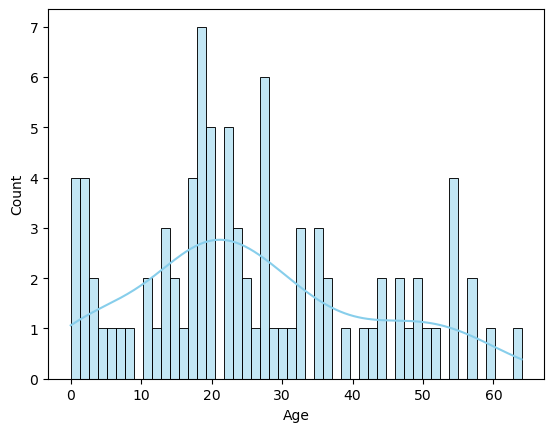

In [254]:
# Check Age distribution in case TotalCost is 0.0 and CryoSleep is null
# High frequency of data appears in 20s younger -> it may mean their family members paid instead
import matplotlib.pyplot as plt
import seaborn as sns
tmp_age = train[(train['TotalCost'] == 0.0) & (train['CryoSleep'].isnull())]['Age']
sns.histplot(tmp_age, kde=True, color='skyblue', bins=50)
plt.show()

- Fill NaN in CryoSleep with <b><span style="color:yellow">mode</span></b>
    - in case Age < 20 and TotalCost is 0.0
- Fill NaN in CryoSleep with <b><span style="color:green">True</span></b>
    - in case Age > 20 and TotalCost is 0.0
- Fill NaN in CryoSleep with <b><span style="color:red">False</span></b>
    - in case TotalCost is upper 0.0

In [255]:
train['CryoSleep'].mode()

0    False
dtype: object

In [256]:
# Fill NaN CryoSleep
def fillna_cryosleep(dataframe):
    tmp_df = dataframe[(dataframe['CryoSleep'].isnull()) & (dataframe['TotalCost'] == 0.0)].copy()
    
    # in case Age < 20 and TotalCost is 0.0
    idx = tmp_df[(tmp_df['Age'] < 20) & (tmp_df['TotalCost'] == 0.0)].index
    tmp_df.loc[idx, 'CryoSleep'] = dataframe['CryoSleep'].mode()[0]
    
    # in case Age > 20 and TotalCost is 0.0
    idx = tmp_df[(tmp_df['Age'] >= 20) & (tmp_df['TotalCost'] == 0.0)].index
    tmp_df.loc[idx, 'CryoSleep'] = True
    
    dataframe.loc[tmp_df.index, 'CryoSleep'] = tmp_df['CryoSleep']
    
    # in case TotalCost is upper 0.0
    idx = dataframe[(dataframe['CryoSleep'].isnull()) & (dataframe['TotalCost'] > 0.0)].index
    dataframe.loc[idx, 'CryoSleep'] = False
    
    return dataframe

In [257]:
fillna_cryosleep(train).isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalCost         0
dtype: int64

In [258]:
train['CryoSleep'].value_counts()

False    5603
True     3090
Name: CryoSleep, dtype: int64

In [259]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalCost         0
dtype: int64

- Fill NaN in HomePlanet
    - Same LastName in a Group has same HomePlanet -> Can fill NaN with other data in grouped DF
    - After fill NaN with upper way, fill other NaN with <b><span style="color:yellow">mode</span></b>

In [260]:
# Create 'Group' with PassengerId(gggg_pp)
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0])

In [261]:
# Create tmp DF with Group to check data in unique Group values
tmp_duplicated = train[train.duplicated('Group', keep=False)]

In [262]:
tmp_duplicated['HomePlanet'].isnull().sum()

92

In [263]:
# Create tmp DF only has NaN in HomePlanet
tmp_isnull = tmp_duplicated[tmp_duplicated['HomePlanet'].isnull()]

In [264]:
len(tmp_isnull['Group'].unique())

90

In [265]:
# A function that checks the unique values ​​of data in a specific column in a Group
def check_value_grouped(df, col_name, chk_col_name):
    for value in df[col_name].unique():
        tmp_df = df[df[col_name] == value]
        
        if len(tmp_df[chk_col_name].unique()) > 1:
            print(value, list(tmp_df[chk_col_name].unique()))

In [266]:
check_value_grouped(tmp_isnull, 'Group', 'HomePlanet')

In [267]:
# A function used in groupby().transform() to fill NaN in a specific group
def fillna_in_transform(group):
    import pandas as pd
    
    first_value = group.iloc[0]

    if pd.isna(first_value):
        for value in group:
            if not pd.isna(value):
                return value

In [268]:
# A function that fills NaN when it is possible to fill NaN when grouped
def fillna_with_grouping(dataframe, group_column_name, column_name):
    tmp_duplicated = dataframe[dataframe.duplicated(group_column_name, keep=False)]
    tmp_grouped = tmp_duplicated.groupby(group_column_name)[column_name].transform(fillna_in_transform).to_frame()
    
    tmp_duplicated[column_name].update(tmp_grouped[column_name])
    dataframe[column_name].update(tmp_duplicated[column_name])
    
    return dataframe

In [269]:
fillna_with_grouping(train, 'Group', 'HomePlanet')

C:\Users\chj65\AppData\Local\Temp\ipykernel_14844\1591251860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_duplicated[column_name].update(tmp_grouped[column_name])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280


In [270]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)

In [271]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalCost         0
Group             0
dtype: int64

- Split Cabin to Deck and Side

In [272]:
# Split Cabin to "Deck" and "Side"
import pandas as pd
train['Deck'] = train['Cabin'].apply(lambda x: x if pd.isnull(x) else x.split('/')[0])
train['Side'] = train['Cabin'].apply(lambda x: x if pd.isnull(x) else x.split('/')[2])

In [273]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost,Group,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,F,S


In [274]:
print(train['Side'].unique(), len(train['Side'].unique()))

['P' 'S' nan] 3


In [275]:
check_value_grouped(train, 'Group', 'Side')

0110 [nan, 'P']
0244 [nan, 'S']
0278 [nan, 'P']
0287 [nan, 'P']
0348 ['P', nan]
0453 ['S', nan]
0498 [nan, 'S']
0693 [nan, 'S']
0709 ['S', nan]
0753 ['P', nan]
0823 ['S', nan]
0992 ['S', nan]


1006 ['S', nan]
1011 [nan, 'P']
1116 ['S', nan]
1148 ['P', nan]
1228 [nan, 'S']
1308 [nan, 'S']
1404 ['S', nan]
1434 ['P', nan]
1452 ['P', nan]
1550 ['S', nan]
1568 [nan, 'P']
1581 ['P', nan]
1655 [nan, 'S']
1685 [nan, 'P']
1688 ['S', nan]
1709 ['S', nan]
1782 [nan, 'S']
1882 ['S', nan]
1892 ['P', nan]
2092 ['S', nan]
2104 ['S', nan]
2272 ['P', nan]
2384 ['S', nan]
2547 [nan, 'P']
3091 [nan, 'S']
3195 ['S', nan]
3287 ['S', nan]
3292 ['S', nan]
3520 ['P', nan]
3521 [nan, 'S']
3535 [nan, 'S']
3641 ['P', nan]
3719 [nan, 'S']
3755 [nan, 'P']
4005 ['P', nan]
4030 ['S', nan]
4181 ['P', nan]
4295 ['P', nan]
4336 ['S', nan]
4625 ['S', nan]
4662 ['P', nan]
4690 ['P', nan]
4782 [nan, 'S']
4796 [nan, 'S']
4836 [nan, 'S']
4974 ['P', nan]
5254 ['S', nan]
5303 [nan, 'P']
5601 ['S', nan]
5642 ['S', nan]
5686 [nan, 'P']
5756 ['P', nan]
6000 [nan, 'P']
6028 ['P', nan]
6111 ['P', nan]
6141 ['S', nan]
6302 ['P', nan]
6363 [nan, 'P']
6405 ['S', nan]
6406 [nan, 'S']
6421 ['P', nan]
6634 ['P', nan]
6810 ['S

- Fill NaN in Side
    - It seems that a group has same Side -> Can fill NaN with other data in grouped DF
    - After fill NaN with upper way, fill other NaN with <b><span style="color:yellow">mode</span></b>

In [276]:
tmp_duplicated = train[train.duplicated('Group', keep=False)]

In [277]:
train['Side'].isnull().sum()

199

In [278]:
fillna_with_grouping(train, 'Group', 'Side')

C:\Users\chj65\AppData\Local\Temp\ipykernel_14844\1591251860.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_duplicated[column_name].update(tmp_grouped[column_name])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalCost,Group,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9276,A,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,9278,G,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,9279,G,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,9280,E,S


In [279]:
train['Side'].fillna(train['Side'].mode()[0], inplace=True)

In [280]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalCost         0
Group             0
Deck            199
Side              0
dtype: int64

- It seems that NaN cannot be filled with specific data in Destination, VIP, Deck -> Fill NaN with <b><span style="color:yellow">mode</span></b>
- Cabin is splitted to Deck and Side -> Drop
- Name is unlikely to affect the prediction -> Drop
- Group belongs to PassengerId -> Drop
- TotalCost was created by cost values -> Drop

In [281]:
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
train['Deck'].fillna(train['Deck'].mode()[0], inplace=True)

In [282]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
TotalCost         0
Group             0
Deck              0
Side              0
dtype: int64

In [283]:
train.drop(['Cabin', 'Name', 'Group', 'TotalCost'], axis='columns', inplace=True)

In [284]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
 12  Deck          8693 non-null   object 
 13  Side          8693 non-null   object 
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


In [285]:
'''# Preprocessing datset
def preprocess_df(dataframe):
    tmp_mode = dataframe.mode().iloc[0, :]
    tmp_median = dataframe.median(numeric_only=True)

    value = {
        'HomePlanet' : tmp_mode['HomePlanet'],
        'CryoSleep' : tmp_mode['CryoSleep'],
        'Cabin' : tmp_mode['Cabin'],
        'Destination' : tmp_mode['Destination'],
        'Age' : tmp_median['Age'],
        'VIP' : tmp_mode['VIP'],
        'RoomService' : tmp_median['Age'],
        'FoodCourt' : tmp_median['Age'],
        'ShoppingMall' : tmp_median['Age'],
        'Spa' : tmp_median['Age'],
        'VRDeck' : tmp_median['Age']
    }

    # Fill NaN
    dataframe.fillna(value=value, inplace=True)
    
    # Split Cabin to "Deck" and "Side"
    dataframe['Deck'] = dataframe['Cabin'].apply(lambda x: x.split('/')[0])
    dataframe['Side'] = dataframe['Cabin'].apply(lambda x: x.split('/')[2])
    
    # Drop "Name" and "Cabin"
    dataframe.drop(labels=['Name', 'Cabin'], axis='columns', inplace=True)
    
    return dataframe'''

'# Preprocessing datset\ndef preprocess_df(dataframe):\n    tmp_mode = dataframe.mode().iloc[0, :]\n    tmp_median = dataframe.median(numeric_only=True)\n\n    value = {\n        \'HomePlanet\' : tmp_mode[\'HomePlanet\'],\n        \'CryoSleep\' : tmp_mode[\'CryoSleep\'],\n        \'Cabin\' : tmp_mode[\'Cabin\'],\n        \'Destination\' : tmp_mode[\'Destination\'],\n        \'Age\' : tmp_median[\'Age\'],\n        \'VIP\' : tmp_mode[\'VIP\'],\n        \'RoomService\' : tmp_median[\'Age\'],\n        \'FoodCourt\' : tmp_median[\'Age\'],\n        \'ShoppingMall\' : tmp_median[\'Age\'],\n        \'Spa\' : tmp_median[\'Age\'],\n        \'VRDeck\' : tmp_median[\'Age\']\n    }\n\n    # Fill NaN\n    dataframe.fillna(value=value, inplace=True)\n    \n    # Split Cabin to "Deck" and "Side"\n    dataframe[\'Deck\'] = dataframe[\'Cabin\'].apply(lambda x: x.split(\'/\')[0])\n    dataframe[\'Side\'] = dataframe[\'Cabin\'].apply(lambda x: x.split(\'/\')[2])\n    \n    # Drop "Name" and "Cabin"\n    d

In [286]:
# get dummies of nominal data
def encode_df(dataframe):
    import pandas as pd
    
    res_df = dataframe.copy()
    
    for column in dataframe.columns:
        
        if dataframe[column].dtype == 'object':
            encoded_column = pd.get_dummies(dataframe[column], prefix=column)
            res_df = pd.concat([res_df, encoded_column], axis=1)
            res_df.drop(column, axis=1, inplace=True)
            
        elif dataframe[column].dtype == 'bool':
            res_df[column] = dataframe[column].apply(lambda x: 1 if x else 0)
            
        else:
            continue

    return res_df

In [287]:
train_encoded = encode_df(train.iloc[:, 1:])

In [288]:
train_encoded.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [289]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   VIP                        8693 non-null   int64  
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   Transported                8693 non-null   int64  
 8   HomePlanet_Earth           8693 non-null   uint8  
 9   HomePlanet_Europa          8693 non-null   uint8  
 10  HomePlanet_Mars            8693 non-null   uint8  
 11  CryoSleep_False            8693 non-null   uint8  
 12  CryoSleep_True             8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

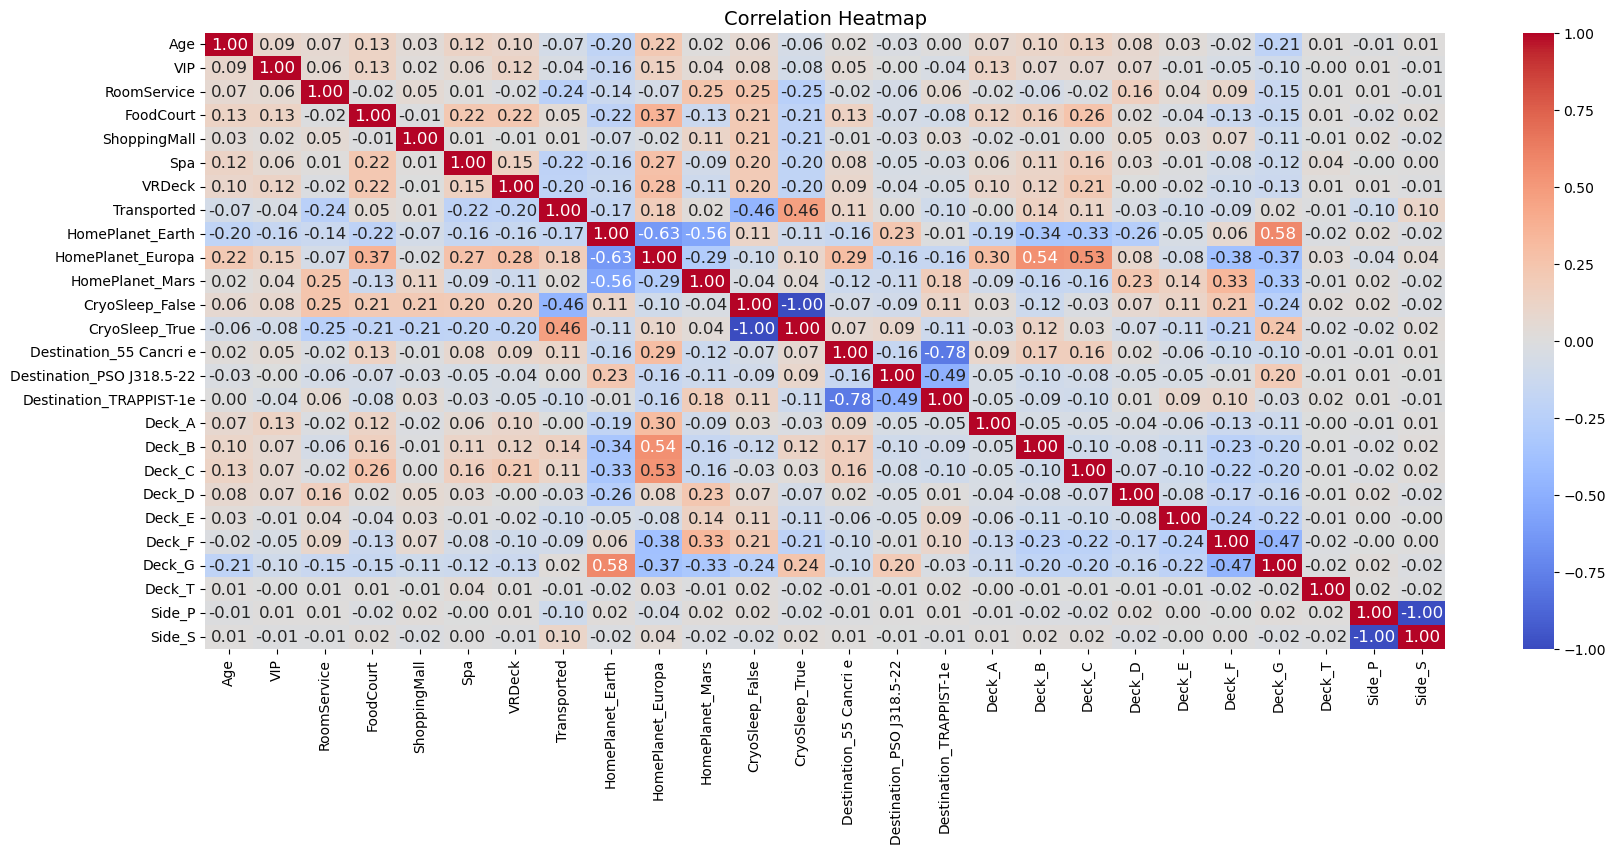

In [290]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_encoded.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

- There is a strong correlation between CryoSleep_True and CryoSleep_False, bwtween Side_P and Side_S -> Drop one from each columns
- There is a rather strong correlation between Destination_55 Cancri e and Destination_TRAPPIST-1e -> Drop one
- HomePlanet_Earth has a rather strong correlation with other HomePlanets -> Drop

In [291]:
train_encoded.drop(['CryoSleep_False', 'Side_S', 'Destination_55 Cancri e', 'HomePlanet_Earth'], axis='columns', inplace=True)

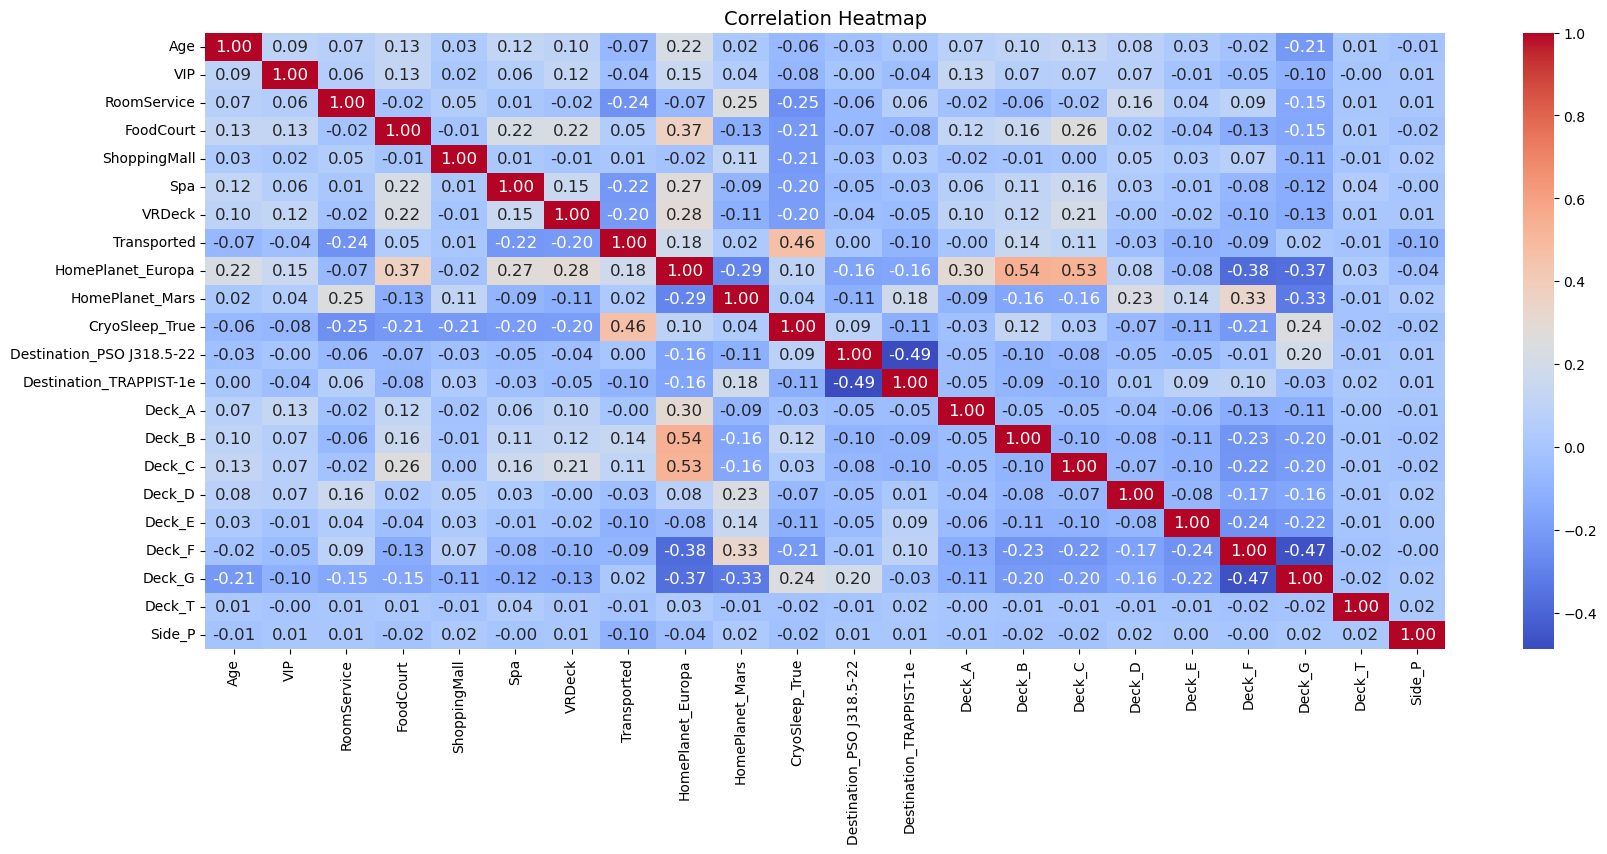

In [292]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_encoded.corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

## Random Forest Classifier

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [293]:
# Split train, test dataset
X = train_encoded.drop('Transported', axis=1)
y = train_encoded['Transported']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [294]:
# Fit model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict test
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy : ', acc)

Accuracy :  0.7952846463484762


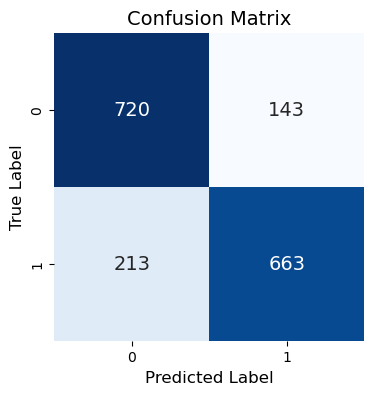

In [295]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 14})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

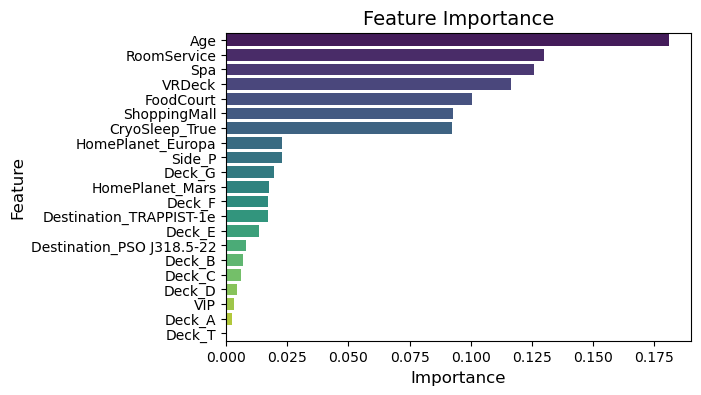

In [296]:
# Visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.show()

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate best model accuracy
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Test Accuracy: 0.8010350776308223
